In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = {
    'Configuration': [
        'Original', '1 layer Genomic FE', '2 layers Genomic FE', '2 layers Clinical FE', '1 layer Clinical FE',
        '1 layer both FEs', '2 layers both FEs', '1 layer Classifier'
    ],
    'AUC_BRCA': [
        (0.839, 0.044), (0.78124, 0.04709), (0.80866, 0.04344), (0.78564, 0.05791), (0.80484, 0.04954),
        (0.78852, 0.04812), (0.76152, 0.06402), (0.79164, 0.04878)
    ],
    'PRC_BRCA': [
        (0.348, 0.090), (0.24115, 0.06781), (0.34497, 0.10849), (0.36411, 0.11002), (0.29348, 0.08637),
        (0.24578, 0.06356), (0.31470, 0.10096), (0.26321, 0.06854)
    ],
    'C-INDEX_BRCA': [
        (0.823, 0.043), (0.76804, 0.04429), (0.79302, 0.04329), (0.76928, 0.05710), (0.78994, 0.04883),
        (0.77393, 0.04590), (0.74746, 0.06331), (0.77673, 0.04648)
    ],
    'AUC_LUAD': [
        (0.645, 0.060), (0.63852, 0.05914), (0.63449, 0.04649), (0.63862, 0.04362), (0.60897, 0.05997),
        (0.59625, 0.06192), (0.60264, 0.05970), (0.65477, 0.05380)
    ],
    'PRC_LUAD': [
        (0.509, 0.082), (0.55077, 0.08405), (0.50389, 0.07192), (0.49566, 0.07026), (0.48236, 0.07834),
        (0.47080, 0.07993), (0.48052, 0.08039), (0.54086, 0.08162)
    ],
    'C-INDEX_LUAD': [
        (0.587, 0.049), (0.59935, 0.04779), (0.58715, 0.04265), (0.59715, 0.03595), (0.57241, 0.05129),
        (0.56418, 0.04818), (0.56664, 0.04742), (0.61433, 0.04248)
    ],
    'AUC_COAD': [
        (0.712, 0.073), (0.54090, 0.07652), (0.58261, 0.05808), (0.52120, 0.06686), (0.55922, 0.07089),
        (0.51857, 0.07958), (0.59098, 0.07416), (0.54723, 0.08257)
    ],
    'PRC_COAD': [
        (0.498, 0.102), (0.29070, 0.06475), (0.33984, 0.07092), (0.30246, 0.06463), (0.29674, 0.06424),
        (0.30329, 0.06835), (0.35300, 0.07572), (0.32019, 0.07147)
    ],
    'C-INDEX_COAD': [
        (0.696, 0.067), (0.54381, 0.06727), (0.58018, 0.04845), (0.52126, 0.05654), (0.55216, 0.06200),
        (0.51595, 0.06711), (0.58441, 0.06634), (0.54670, 0.07117)
    ]
}


In [12]:
df_metrics_updated = pd.DataFrame(data)

In [13]:
# Replotting the metrics with larger font sizes, especially for the title
def plot_metrics_highlighted_larger_fonts(df, metric, error, title, highlight='Original', axis_fontsize=16, title_fontsize=20):
    # Create arrays for the mean values and the standard deviations
    means = df[metric].apply(lambda x: x[0]).values
    errors = df[metric].apply(lambda x: x[1]).values
    # configs = [config.replace('Genomic', 'Genomic FE')
    #                   .replace('Clinical', 'Clinical FE')
    #                   .replace('Both', 'both FEs') for config in df['Configuration'].values]
    configs = df['Configuration'].values
    
    # Identify the index of the original and the best configuration
    original_idx = np.where(df['Configuration'] == highlight)[0][0]
    best_idx = np.argmax(means)
    
    # Setting up the plotting
    x_pos = np.arange(len(configs))
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Creating the bar chart
    bars = ax.bar(x_pos, means, yerr=errors, align='center', alpha=0.7, ecolor='black', capsize=10, color='gray')
    # Highlight the original and the best configuration
    bars[original_idx].set_color('green')  # Original in green
    bars[best_idx].set_color('red')  # Best in red
    
    ax.set_ylabel(metric.split('_')[0], fontsize=axis_fontsize)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(configs, rotation=45, ha="right", fontsize=axis_fontsize)
    ax.set_title(f'{title} across different layer configurations', fontsize=title_fontsize)
    ax.yaxis.grid(True)

    # Add legend
    ax.legend([bars[original_idx], bars[best_idx]], ['Original', 'Best'], fontsize=axis_fontsize)

    # Save the plot
    plt.savefig(f'figures/{metric}_highlighted.pdf', bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    


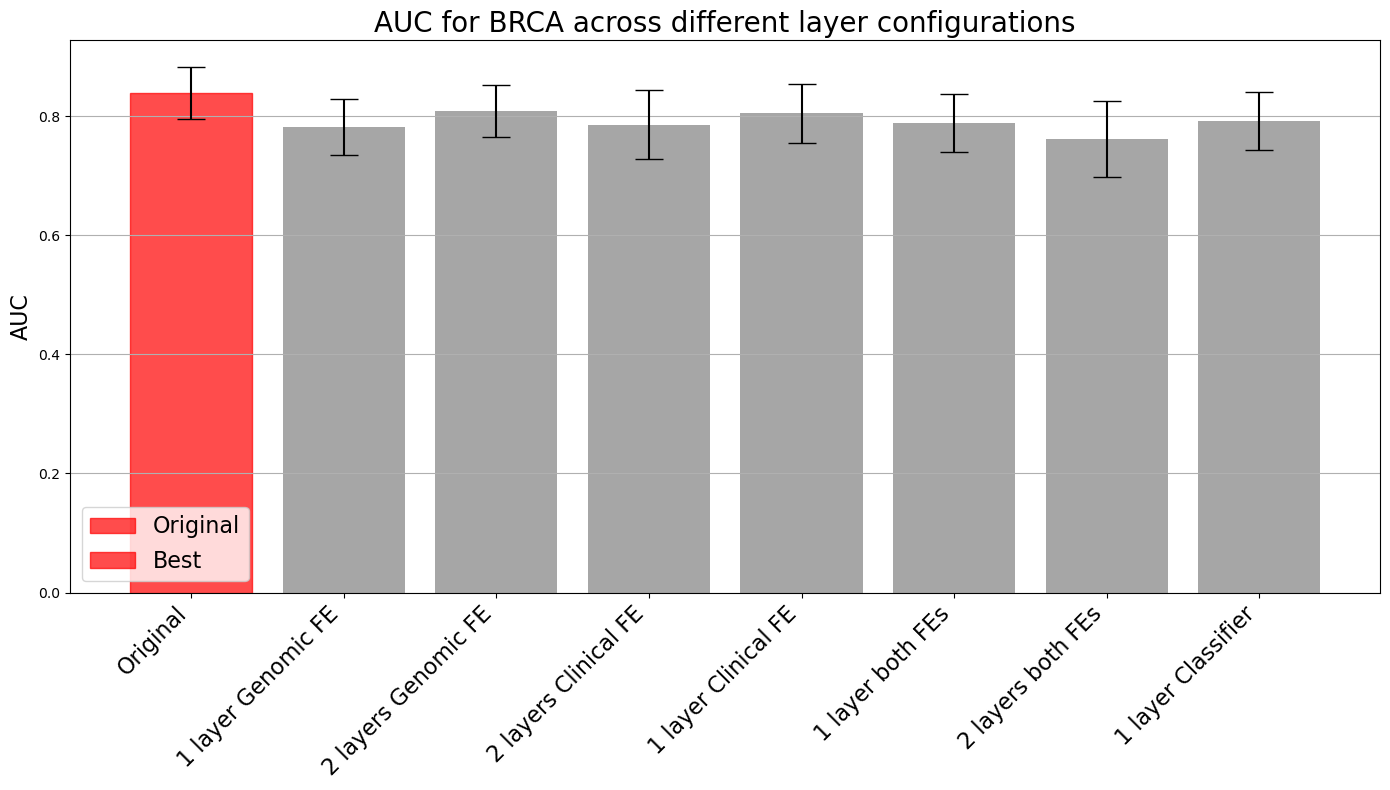

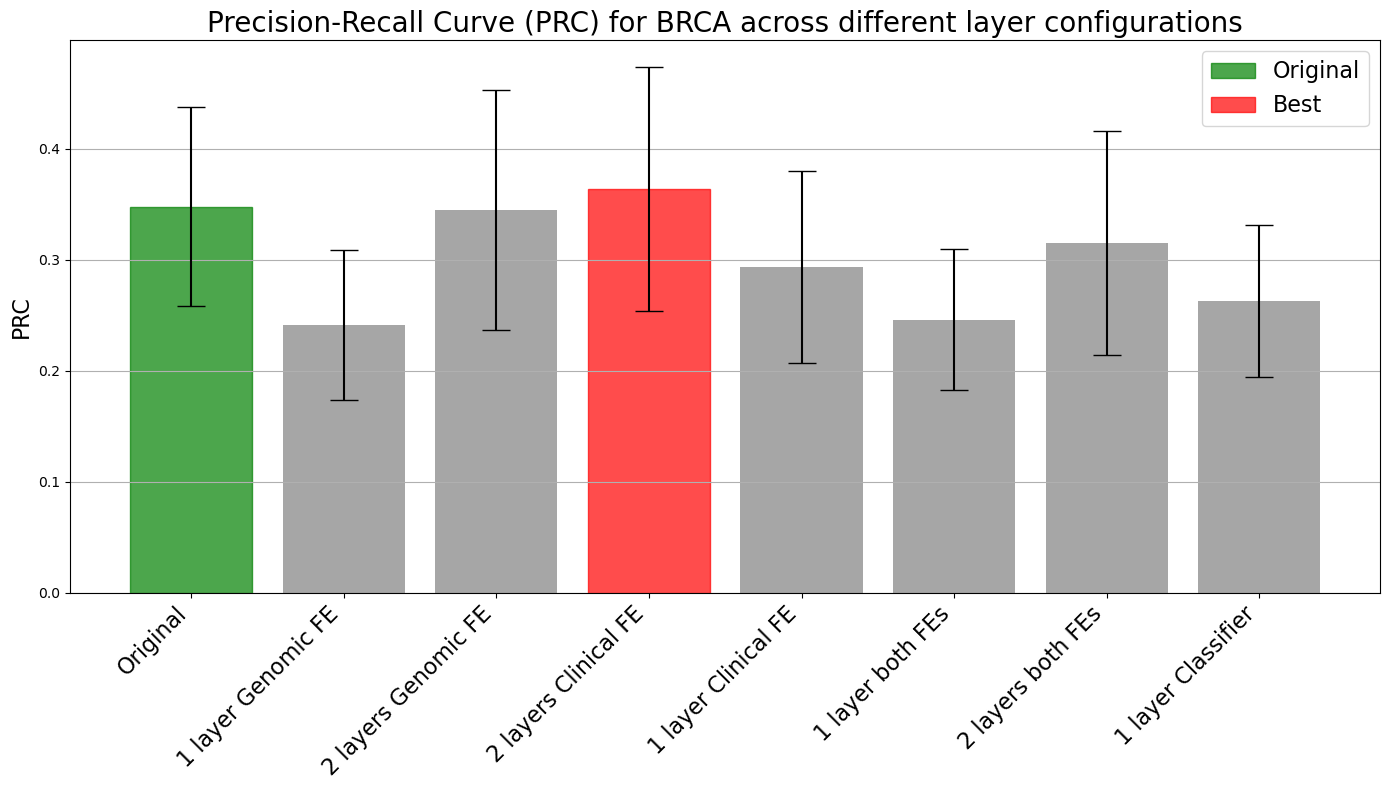

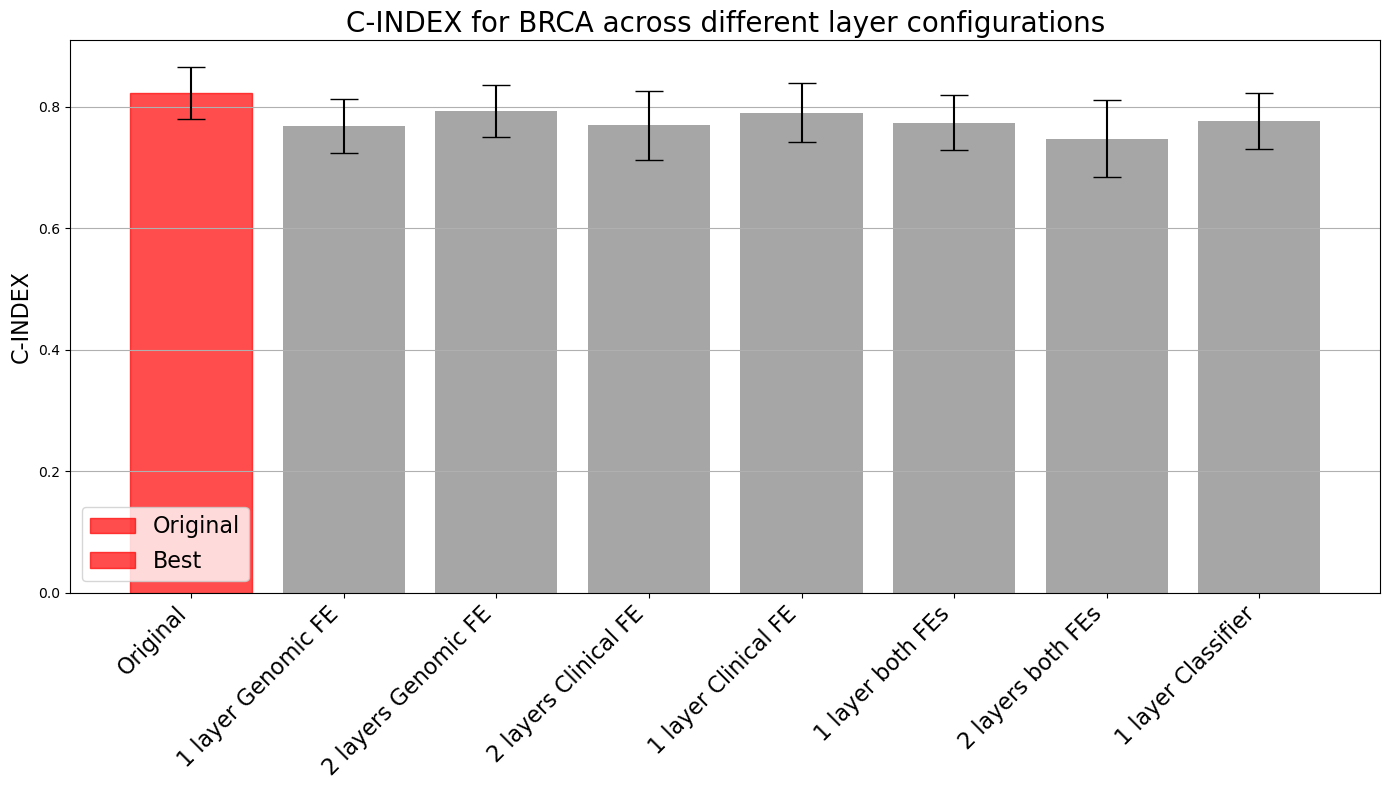

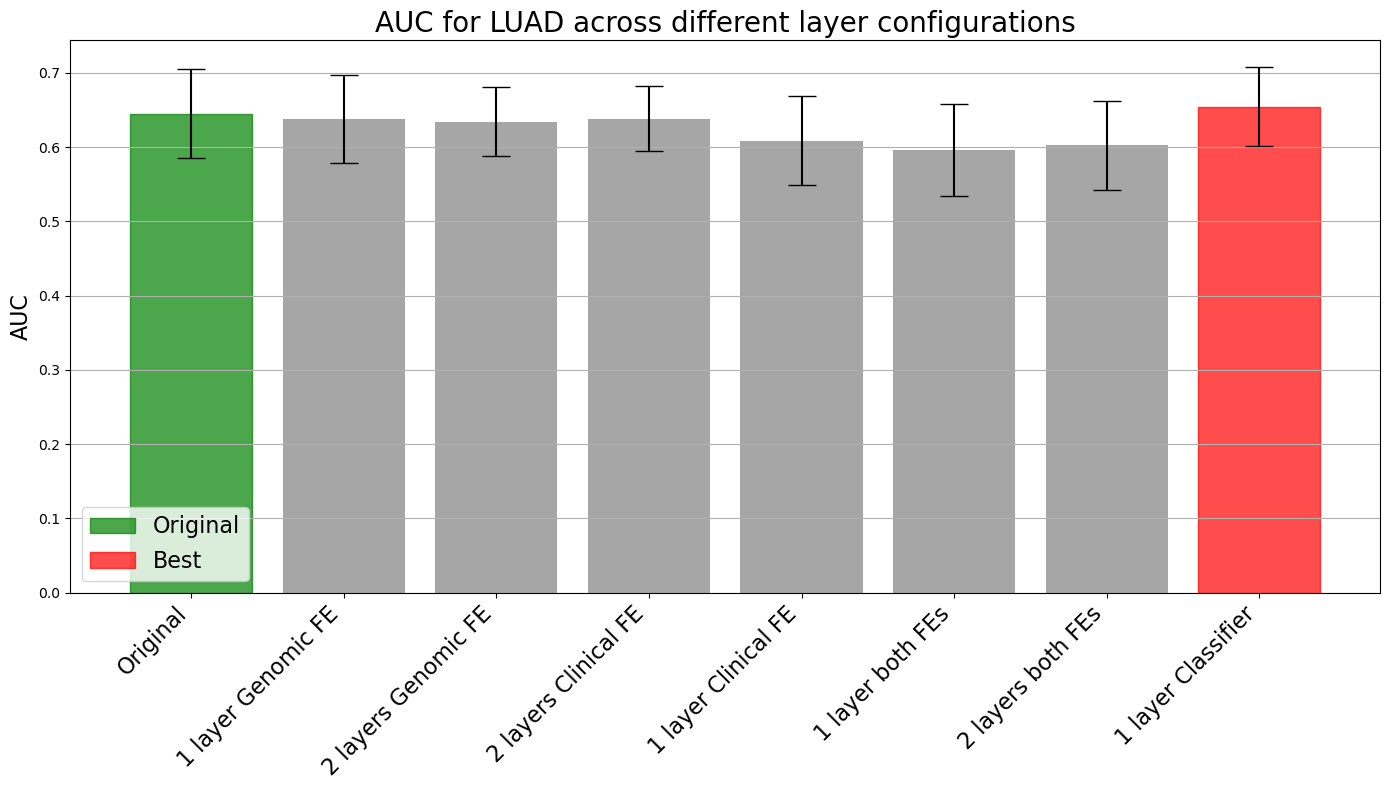

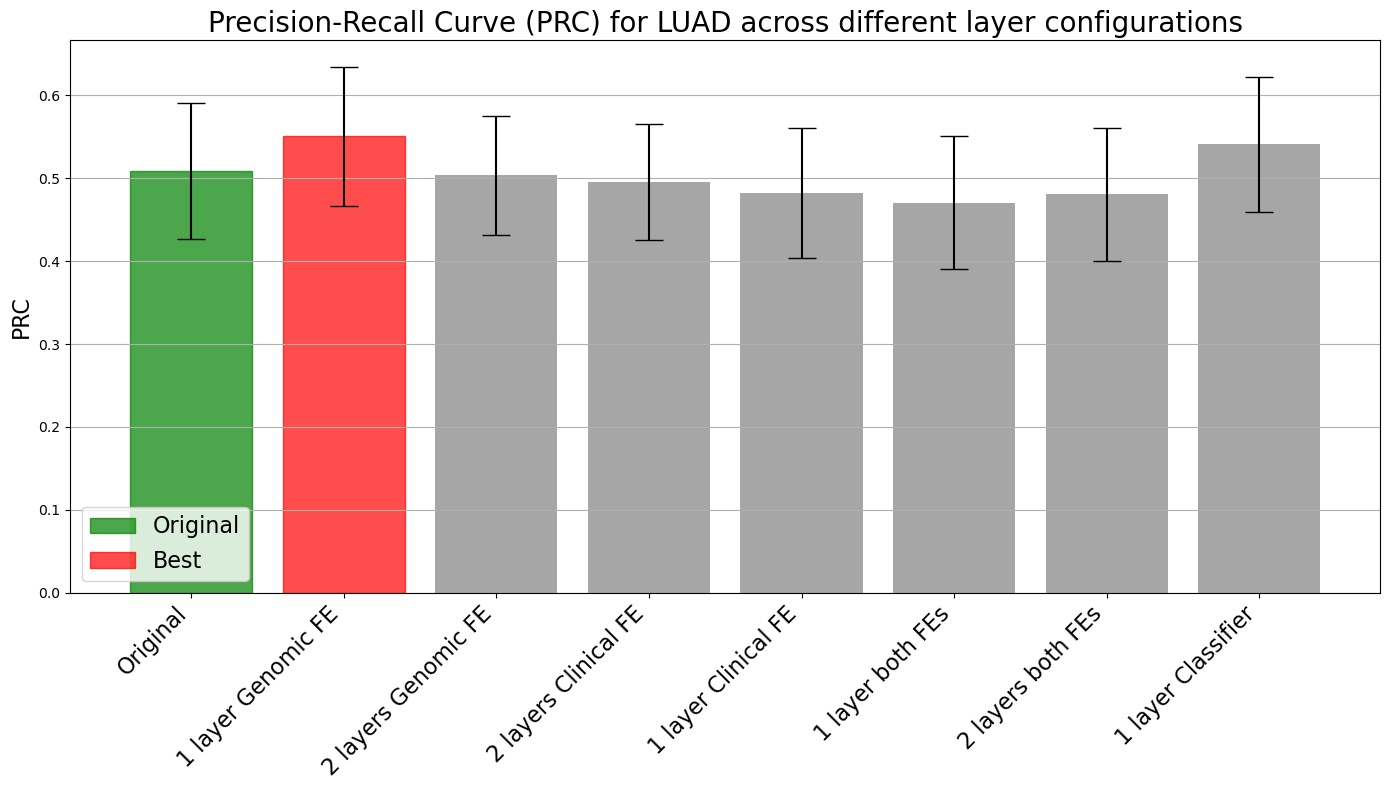

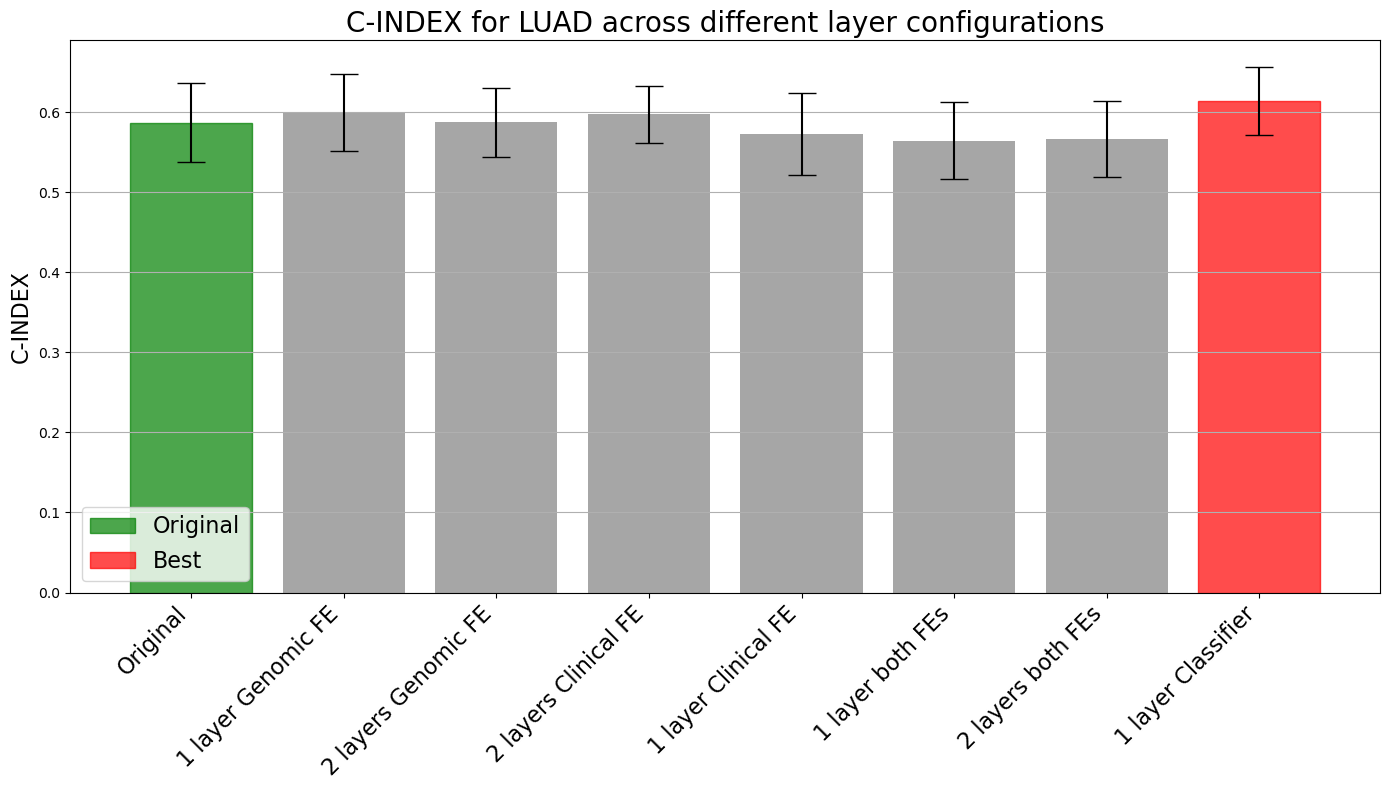

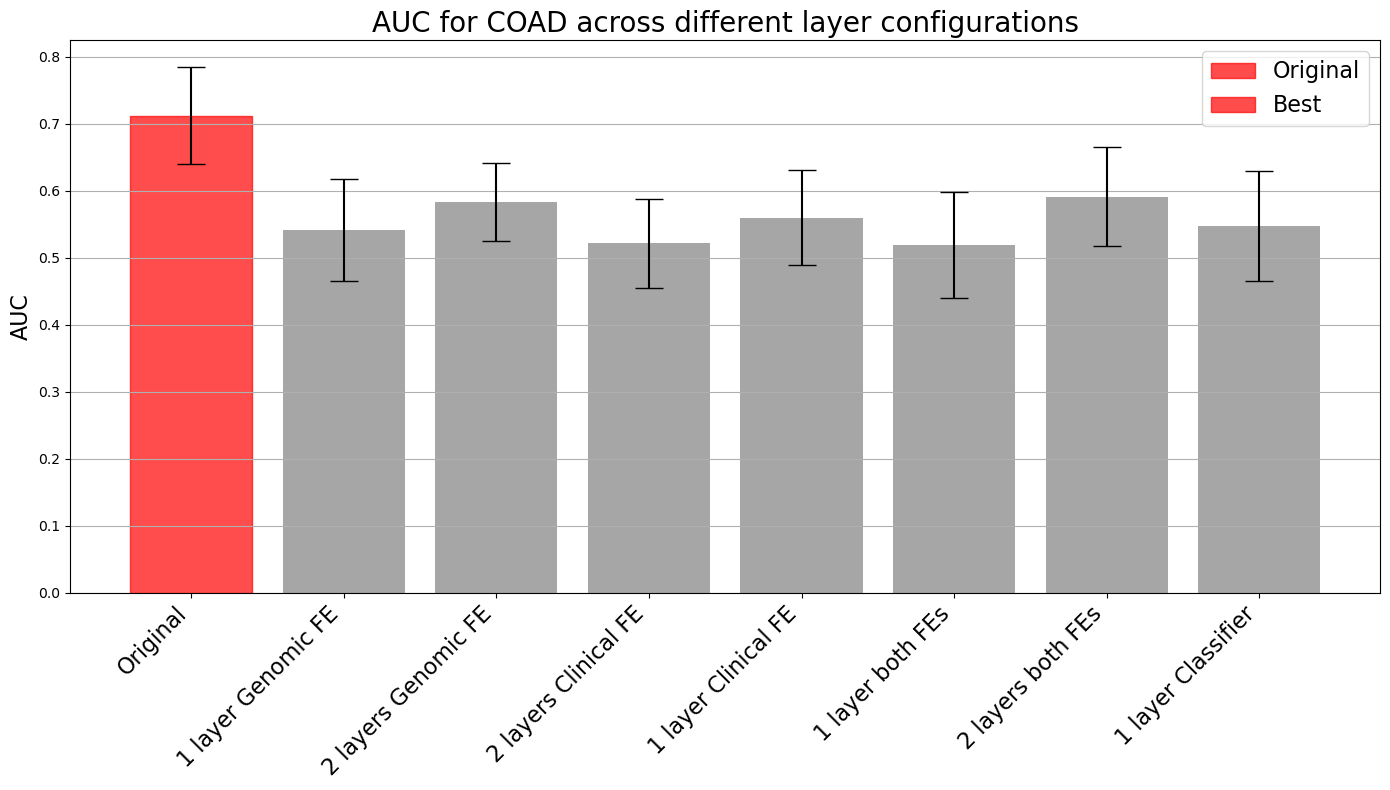

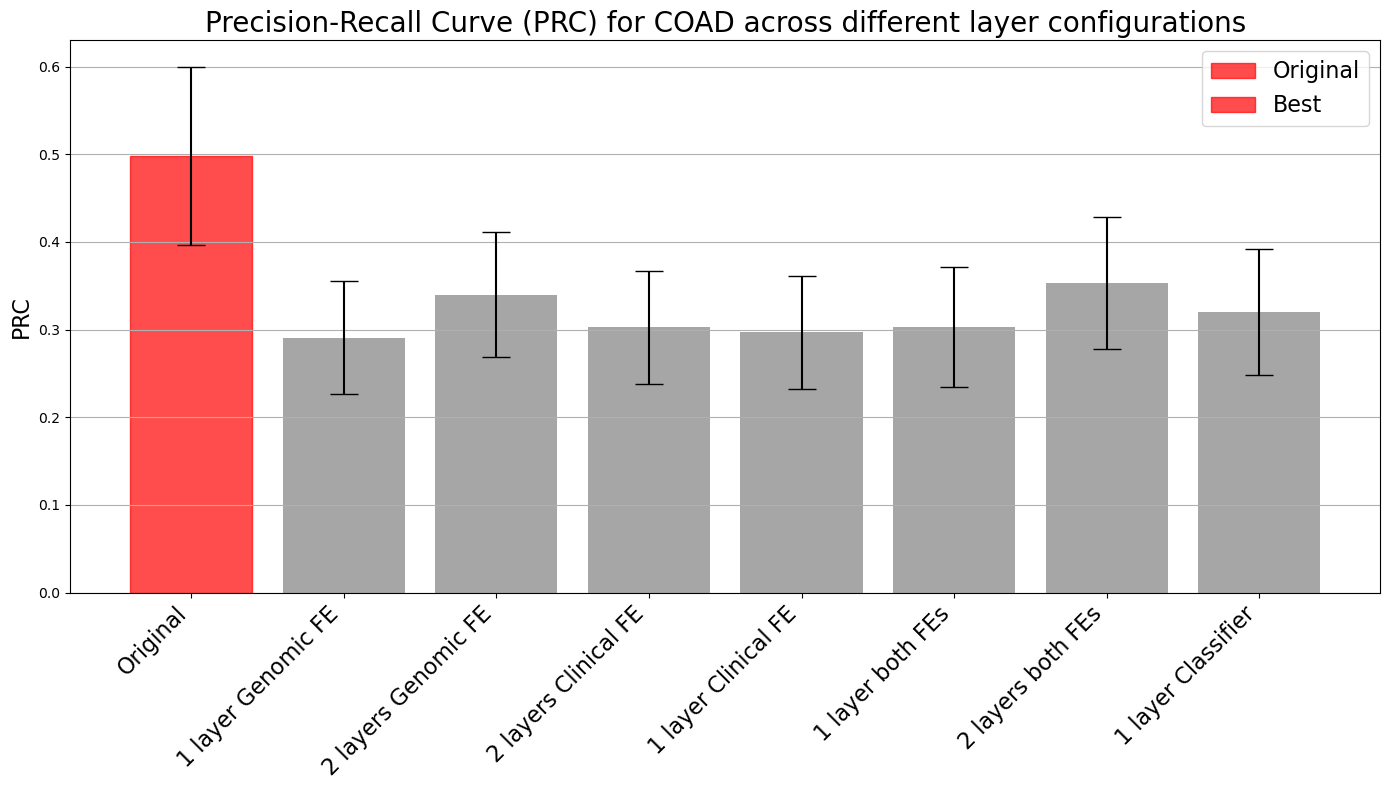

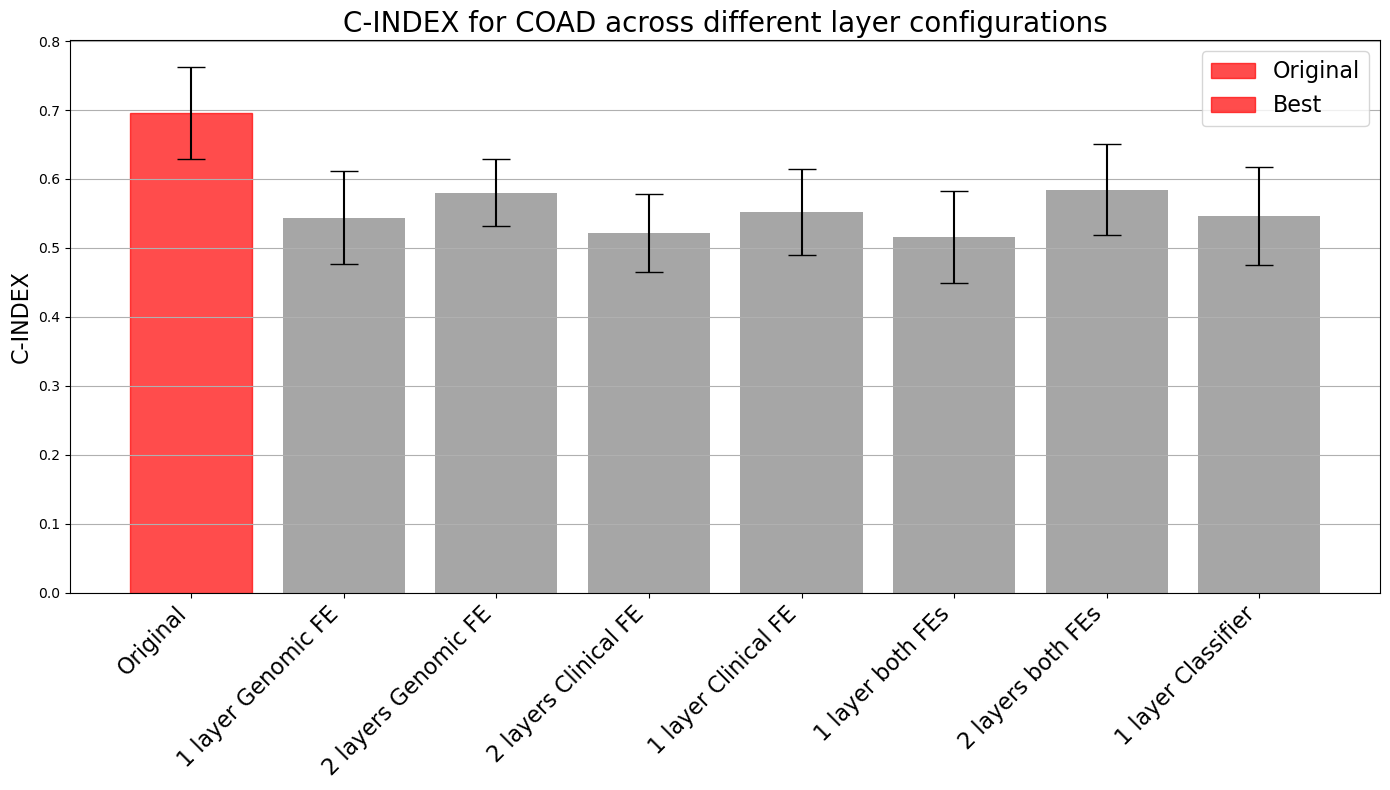

In [14]:

# Replotting the metrics with increased font sizes
plot_metrics_highlighted_larger_fonts(df_metrics_updated, 'AUC_BRCA', 'Error', 'AUC for BRCA', 'Original')
plot_metrics_highlighted_larger_fonts(df_metrics_updated, 'PRC_BRCA', 'Error', 'Precision-Recall Curve (PRC) for BRCA', 'Original')
plot_metrics_highlighted_larger_fonts(df_metrics_updated, 'C-INDEX_BRCA', 'Error', 'C-INDEX for BRCA', 'Original')

plot_metrics_highlighted_larger_fonts(df_metrics_updated, 'AUC_LUAD', 'Error', 'AUC for LUAD', 'Original')
plot_metrics_highlighted_larger_fonts(df_metrics_updated, 'PRC_LUAD', 'Error', 'Precision-Recall Curve (PRC) for LUAD', 'Original')
plot_metrics_highlighted_larger_fonts(df_metrics_updated, 'C-INDEX_LUAD', 'Error', 'C-INDEX for LUAD', 'Original')

plot_metrics_highlighted_larger_fonts(df_metrics_updated, 'AUC_COAD', 'Error', 'AUC for COAD', 'Original')
plot_metrics_highlighted_larger_fonts(df_metrics_updated, 'PRC_COAD', 'Error', 'Precision-Recall Curve (PRC) for COAD', 'Original')
plot_metrics_highlighted_larger_fonts(df_metrics_updated, 'C-INDEX_COAD', 'Error', 'C-INDEX for COAD', 'Original')
